# Notebook : Chunking


## About

In this notebook, we will explore how to to break the text into manageable chunks using different strategy.

- Fixed Character / Token Length
- Recursive Character Chunking
- Document Specific Chunking ( PDF, Markdown, HTML, Code)
- Semantic Chunking


In [1]:
import rich
from IPython.display import Image


## Sample Transcript

In [2]:
transcript = f"""

New York City has some absolutely iconic food and today that's all I'm going to be eating.
We'll show you New York's best bagels hot dogs Pastrami and more.  
Get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure. 
"""

In [3]:
print (transcript)



New York City has some absolutely iconic food and today that's all I'm going to be eating.
We'll show you New York's best bagels hot dogs Pastrami and more.  
Get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure. 



## Token

By default, LlamaIndex uses a global tokenizer for all token counting. 

This defaults to `cl100k` from tiktoken, which is the tokenizer to match the default LLM gpt-3.5-turbo.

In [4]:
import tiktoken

In [5]:
encoding_gpt4 = tiktoken.encoding_for_model("gpt-4o-mini")
encoding_gpt4

<Encoding 'o200k_base'>

In [6]:
encoding_gpt3 = tiktoken.encoding_for_model("gpt-3.5-turbo")
encoding_gpt3

<Encoding 'cl100k_base'>

In [7]:
sample_sentence = "Artificial intelligence is transforming industries. Neuroplasticity and adaptability"


In [8]:
tokens = encoding_gpt3.encode(sample_sentence)

decoded_tokens = [encoding_gpt3.decode([token]) for token in tokens]

rich.print ("tokens:", tokens )

rich.print ("decoded tokens:", decoded_tokens )



tokens:
[9470, 16895, 11478, 374, 46890, 19647, 13, 32359, 501, 5174, 488, 323, 10737, 2968]

decoded tokens:
[
    'Art',
    'ificial',
    ' intelligence',
    ' is',
    ' transforming',
    ' industries',
    '.',
    ' Neuro',
    'pl',
    'astic',
    'ity',
    ' and',
    ' adapt',
    'ability'
]

In [9]:
tokens = encoding_gpt4.encode(sample_sentence)

decoded_tokens = [encoding_gpt4.decode([token]) for token in tokens]

rich.print ("tokens:", tokens )

rich.print ("decoded tokens:", decoded_tokens )


tokens:
[186671, 22990, 382, 64779, 22751, 13, 89022, 187126, 536, 326, 188637]

decoded tokens:
[
    'Artificial',
    ' intelligence',
    ' is',
    ' transforming',
    ' industries',
    '.',
    ' Neuro',
    'plastic',
    'ity',
    ' and',
    ' adaptability'
]

Different OpenAI models might use a different tokenizer.    

Notice the larger tokenizer `o200k_base` is able to recognize more tokens

## Text Chunking Strategies

### Token Text Splitter

In [10]:
from llama_index.core.node_parser import TokenTextSplitter
from llama_index.core import Document


![TokenTextSplitter](../images/token_text_splitter.png)


no text overalap

In [11]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript)

In [12]:
len(transcript), len(chunks)

(317, 3)

In [13]:
rich.print (chunks [:5] )

[
    "New York City has some absolutely iconic food and today that's all I'm going to be eating.\nWe'll show you",
    "New York's best bagels hot dogs Pastrami and more.  \nGet ready for the ultimate NYC food tour and",
    'this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure.'
]

Notice in the first sentence `we'll show you New` is part of another sentence, but it is captured

text overlap

because we might loose context, it might be helpful to capture part of the previous sentence

In [14]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=5)
chunks = node_parser.split_text(transcript)

In [15]:
len(transcript), len(chunks)

(317, 4)

In [16]:
rich.print (chunks [:5] )

[
    "New York City has some absolutely iconic food and today that's all I'm going to be eating.\nWe'll show you",
    "show you New York's best bagels hot dogs Pastrami and more.  \nGet ready for the ultimate NYC food",
    'for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket 
list New York',
    'a bucket list New York City Food Adventure.'
]

### Sentence Splitter

Parse text with a preference for complete sentences.

In general, this class tries to keep sentences and paragraphs together. 

Therefore compared to the original TokenTextSplitter, there are less likely to be hanging sentences or parts of sentences at the end of the node chunk.

[Docs](https://docs.llamaindex.ai/en/stable/api_reference/node_parsers/sentence_splitter/)

In [17]:
from llama_index.core.node_parser import SentenceSplitter


In [18]:
node_parser = SentenceSplitter(chunk_size=25, chunk_overlap=5)
chunks = node_parser.split_text(transcript)

In [19]:
len(transcript), len(chunks)

(317, 4)

In [20]:
rich.print (chunks [:5] )

[
    "New York City has some absolutely iconic food and today that's all I'm going to be eating.",
    "We'll show you New York's best bagels hot dogs Pastrami and more.  \nGet ready for the ultimate NYC",
    'ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a 
bucket list New',
    'into a bucket list New York City Food Adventure.'
]

notice the first sentence is captured completely.

### Example with Youtube Transcript

In [21]:
transcript_yt = """
New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New York's best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is filmed in order so you can literally turn this into a bucket list New York City Food Adventure if you want The Bagel the breakfast icon of New York City brought here by polish Jewish immigrants at the turn of the 20th century is there a more New York City breakfast than this debatable well you can tell they mean business when 12 30 on a Monday there's already a super long line an absolute I've heard from so many is the best bagel in New York City and this is the only spot in the video I've never been to so let's find out oh those look so good it's passing the visual test how are you can I get an everything bagel with scallion cream cheese please no thank you all right let's investigate this is the Story of My Life Line dies the second we head out [Music] everyone in New York generally thinks where they're from has the best bagels their neighborhood spot is the best and I've heard about absolute for years finally gonna be trying this legendary Bagel here Morningside Heights you know didn't see a single tourist in line it was like all Columbia students all right let's try this this looks amazing hmm chewy on the outside soft on the inside this is how a New York bagel has to be wow all these years living in the city a dozen years I never tried absolute people push me all the time to try it but I'm glad I finally came that first impression instantly this is going towards the top of my list for New York City Bagels [Music] we're eating so much food today that I did not want to get locks any of their salmon choices the appetizing stuff I want to try that at some point but I have to tell you I'm struggling right now to think of a better Bagel I've ever had in New York old statement coming I think this is the best bagel I've ever had in New York City I would put this in a textbook for a New York City Bagel and a very important note for you all hash only I saw people rushing out telling their friends they'll go to the ATM machine there was a little bit of confusion with that but they don't take pre-orders they don't do delivery they do one thing they do it well Bagels cash only and I mean they have that right they've earned it in my opinion absolute Bagels absolutely recommended what a start to this iconic New York City food tour foreign Ty more iconic in cinema than somebody grabbing a straight hot dog in the city well we've got Billy's here and the story with him is we included him in our best reviewed hot dog video last year and his hot dog stand really blew up an international popularity YouTube channels covered him a lot of my viewers from all over the world said he was fantastic let's go pay him a visit and see if he remembers us love it always a line Billy is a local Legend I've been coming to him since I was mid-30s oh wow I'm 67 years old 30 years huh best in the city well he's always here yeah people have been coming to this guy for decades remember me best reviewed hot dogs in New York City uh we're doing different spots hot dogs pastrami like the best of each category and your hot dog you deserve it man you deserve it oh yeah but you do a great job man so I just want to thank you too I appreciate it you got a hard job man you you got the whole neighborhood here you know no no yeah okay got the baby yes sir here he is six months he's a big boy you're right she was pregnant he tried your hot dog while still in the womb anything you want to say to the people thanks to everybody that's all thank you so much Billy all right okay guys I'll see you soon this is the best man heading to Central Park to Billy's hot dogs doesn't get much better than this Billy does his hot dogs good I'm telling you this is not your average Dirty Water Dog in New York City he puts a lot of love into this we have his onion sauce and some mustard real simple two dollars each nice snap love the onion sauce it's just a little bit of kick now of course you come here for the hot dog you come here for a good hot dog but what you're really coming for is somebody who's been in the neighborhood for well over 30 years for decades and when you go there even if you're not from New York City you're gonna feel like you're from New York City who talks to everybody he'll ask where you're from I'll ask how your day is going you want to feel like a local for just a little bit even if you're not come to Billy's hot dogs and then head to Central Park why not combine the two do Central Park right after the locations absolutely perfect and the hot dogs really good as well if you love New York food and want a really cool gift consider shopping at the online store my wife and I run over on Etsy she's got stickers prints and a whole lot more at really affordable prices ships worldwide see the link in the description [Music] the Jewish deli a New York institution my viewers constantly ask me where do you get a good pastrami sandwich I always point the massages over Katz's for a more local experience I love this spot I want to do the number three corned beef and pastrami always get that like every time and a dark brown celery many people say just get a pastrami I like to mix up the two when I come to sarges so we have rye bread on top of coleslaw Russian dressing then we have some of the fatter pastrami on top of the leaner corned beef so this is the ultimate Jewish deli sandwich in New York City right here you're probably gonna need a fork and knife I'm going to attempt to get at least a few bites for this thing topples over it's so rich so tender in flavor you just want double meat experience combined with that rye bread and the Russian dressing one of my favorite sandwiches in all of New York City and honestly something that I would say New York does better than any place else in the world the deli sandwich you can argue Pizza you can argue Bagels you can argue hot dogs Anthony Bourdain said it many times this is what New York is better than anybody and I think Sarge's does it better than the rest my personal opinion New Yorkers will fight either the death and who their favorites are but I'll tell you I don't see a single tourist in here I've had many of you out there call me out for not ordering doc Browns celery soda I've actually never had celery soda well that's really good I approved this pairing but bring your appetite when you come here sargis is interesting because for years and years they were open 24 hours but after the pandemic like many businesses they do now close at 10 pm so you can't come here at three o'clock in the morning and try to fight a hangover with a big pastrami sandwich anymore no shame using a fork and knife if you want to get your money's worth here no shame all right that was the uh the gut bomb of the video but we've got more [Music] everyone in New York has their favorite pizza spot Bleaker Street has always been mine I lived in the village for 10 years and it is by far my viewers favorite pick that I have ever recorded at I'm constantly getting tagged here so when I pick an iconic pizza spot for the video it's Bleaker Street oh you're welcome you saw this in my video yes yes how is it is it good it's good you approve okay if you guys approve I'm happy where are you from London but originally Estonia oh cool Welcome to New York they approve the pizza I'm happy [Music] wow thank you so much fresh Nona Maria dreams are made of this absolute favorite pizza in all New York City you know first and foremost I love the story of Bleecker Street Pizza it was opened by a retired police captain who served at Ground Zero during 9 11. and this was his grandma's recipe thin crust with fresh mozzarella homemade marinara sauce finest parmesan fresh basil and Parmigiano-Reggiano cheese I think that's like the missing ingredient in a lot of Pies right now in New York City you're seeing Parmigiano-Reggiano cheese being used which is imported from Italy and very very expensive here we go it's been too long since I've had this actually all of those premium ingredients together just hits different I'm telling you I'm not trying to compare this to your everyday New York City slice that's its own animal but this particular slice here it's a specialty it lies somewhere between the neapolitan pizza and a regular New York slice holds up really well nice undercarriage a lot of sauce a lot of cheese very Saucy you're into a saucy slice you are going to fall in love with the Nona Maria everybody behind me is ordering anona Maria this is by far what they're most known for I've had the other slices here before all very good but this this is what you travel to Bleaker Street Pizza for me oh where are you from Croatia was it good too good that's what I like to hear I think of all the places I've ever filmed this is the spot where people almost likely to say hi and it's really cool that a long time ago they put me on the wall of fame here so I don't know if there's a bigger honor in my life than being on the wall of my favorite pizza spot this is like a greatest hits album you know how musicians have their greatest hits one CD one album today's video is just like my favorites thank you a lot of tourists I meet are obsessed with trying New York cheesecake they run to spots like Junior as well I prefer Eileen's special cheesecake hi how can I help two of the classic planes we're just doing it we're doing a YouTube thing about the most iconic foods of New York so is the best you've taken the city that's what I tell people that's why I'm here [Music] they've been open almost 50 years for a reason they were telling me in there that they actually designed these special cheesecakes to be this small for all the tour groups from around the world and tourists that come in I mean I'm always singing their praises as well this is the plane a lot of cream cheese graham cracker crust makes it a little more unique this is really the only dessert I possibly could have had after all the food we feasted on today we will end with this cheesecake icon hello um so light so creamy I want the biggest cheesecake fan but for Eileen's I always make an exception and I just don't think you have to make a special trip to eat cheesecake if you're eating some huge meal and then you gotta force yourself to have dessert this is perfect because you're right on the edge of Soho here so you're probably going to be in the area at some point grab a quick dessert on the go and try New York's most famous dessert Choice cheesecake they baked so many of these so they're so busy they're always getting a fresh piece tart size cheesecake perfect for uh on the go or you could eat it inside remember I put all the addresses down below in the description you want to follow this and make it into a day let me know how it goes because pretty sure you're gonna like it if you like those iconic New York City food choices then you need to watch this video about Halal Street cards these are some of my favorites in the city head here next

"""

In [22]:
rich.print(transcript_yt)

New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New York's
best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is filmed in order 
so you can literally turn this into a bucket list New York City Food Adventure if you want The Bagel the breakfast 
icon of New York City brought here by polish Jewish immigrants at the turn of the 20th century is there a more New 
York City breakfast than this debatable well you can tell they mean business when 12 30 on a Monday there's already
a super long line an absolute I've heard from so many is the best bagel in New York City and this is the only spot 
in the video I've never been to so let's find out oh those look so good it's passing the visual test how are you 
can I get an everything bagel with scallion cream cheese please no thank you all right let's investigate this is 
the Story of My Life Line dies the second we head out [Music] everyone in New York generally thinks where they're 
from has the best bagels their neighborhood spot is the best and I've heard about absolute for years finally gonna 
be trying this legendary Bagel here Morningside Heights you know didn't see a single tourist in line it was like 
all Columbia students all right let's try this this looks amazing hmm chewy on the outside soft on the inside this 
is how a New York bagel has to be wow all these years living in the city a dozen years I never tried absolute 
people push me all the time to try it but I'm glad I finally came that first impression instantly this is going 
towards the top of my list for New York City Bagels [Music] we're eating so much food today that I did not want to 
get locks any of their salmon choices the appetizing stuff I want to try that at some point but I have to tell you 
I'm struggling right now to think of a better Bagel I've ever had in New York old statement coming I think this is 
the best bagel I've ever had in New York City I would put this in a textbook for a New York City Bagel and a very 
important note for you all hash only I saw people rushing out telling their friends they'll go to the ATM machine 
there was a little bit of confusion with that but they don't take pre-orders they don't do delivery they do one 
thing they do it well Bagels cash only and I mean they have that right they've earned it in my opinion absolute 
Bagels absolutely recommended what a start to this iconic New York City food tour foreign Ty more iconic in cinema 
than somebody grabbing a straight hot dog in the city well we've got Billy's here and the story with him is we 
included him in our best reviewed hot dog video last year and his hot dog stand really blew up an international 
popularity YouTube channels covered him a lot of my viewers from all over the world said he was fantastic let's go 
pay him a visit and see if he remembers us love it always a line Billy is a local Legend I've been coming to him 
since I was mid-30s oh wow I'm 67 years old 30 years huh best in the city well he's always here yeah people have 
been coming to this guy for decades remember me best reviewed hot dogs in New York City uh we're doing different 
spots hot dogs pastrami like the best of each category and your hot dog you deserve it man you deserve it oh yeah 
but you do a great job man so I just want to thank you too I appreciate it you got a hard job man you you got the 
whole neighborhood here you know no no yeah okay got the baby yes sir here he is six months he's a big boy you're 
right she was pregnant he tried your hot dog while still in the womb anything you want to say to the people thanks 
to everybody that's all thank you so much Billy all right okay guys I'll see you soon this is the best man heading 
to Central Park to Billy's hot dogs doesn't get much better than this Billy does his hot dogs good I'm telling you 
this is not your average Dirty Water Dog in New York City he puts a lot of love into this we hav

In [23]:
node_parser = TokenTextSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript_yt)
rich.print (chunks [:5] )

[
    "New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New",
    "York's best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is 
filmed",
    'in order so you can literally turn this into a bucket list New York City Food Adventure if you want The Bagel 
the breakfast',
    'icon of New York City brought here by polish Jewish immigrants at the turn of the 20th century is there a more
New',
    "York City breakfast than this debatable well you can tell they mean business when 12 30 on a Monday there's 
already"
]

In [24]:
node_parser = SentenceSplitter(chunk_size=25, chunk_overlap=0)
chunks = node_parser.split_text(transcript_yt)
rich.print (chunks [:5] )

[
    "New York City has some absolutely iconic food and today that's all I'm going to be eating we'll show you New",
    "York's best bagels hot dogs Pastrami and more get ready for the ultimate NYC food tour and this video is 
filmed",
    'in order so you can literally turn this into a bucket list New York City Food Adventure if you want The Bagel 
the breakfast',
    'icon of New York City brought here by polish Jewish immigrants at the turn of the 20th century is there a more
New',
    "York City breakfast than this debatable well you can tell they mean business when 12 30 on a Monday there's 
already"
]

note, because we don't have punctuation,  there is no difference between `TokenTextSplitter` and  `SentenceSplitter`

## Chunking Video

A video is composed of image frames.

Frames per Second (FPS) is one measurement used to capture quality of video.  

More FPS, the smoother the video transitions.

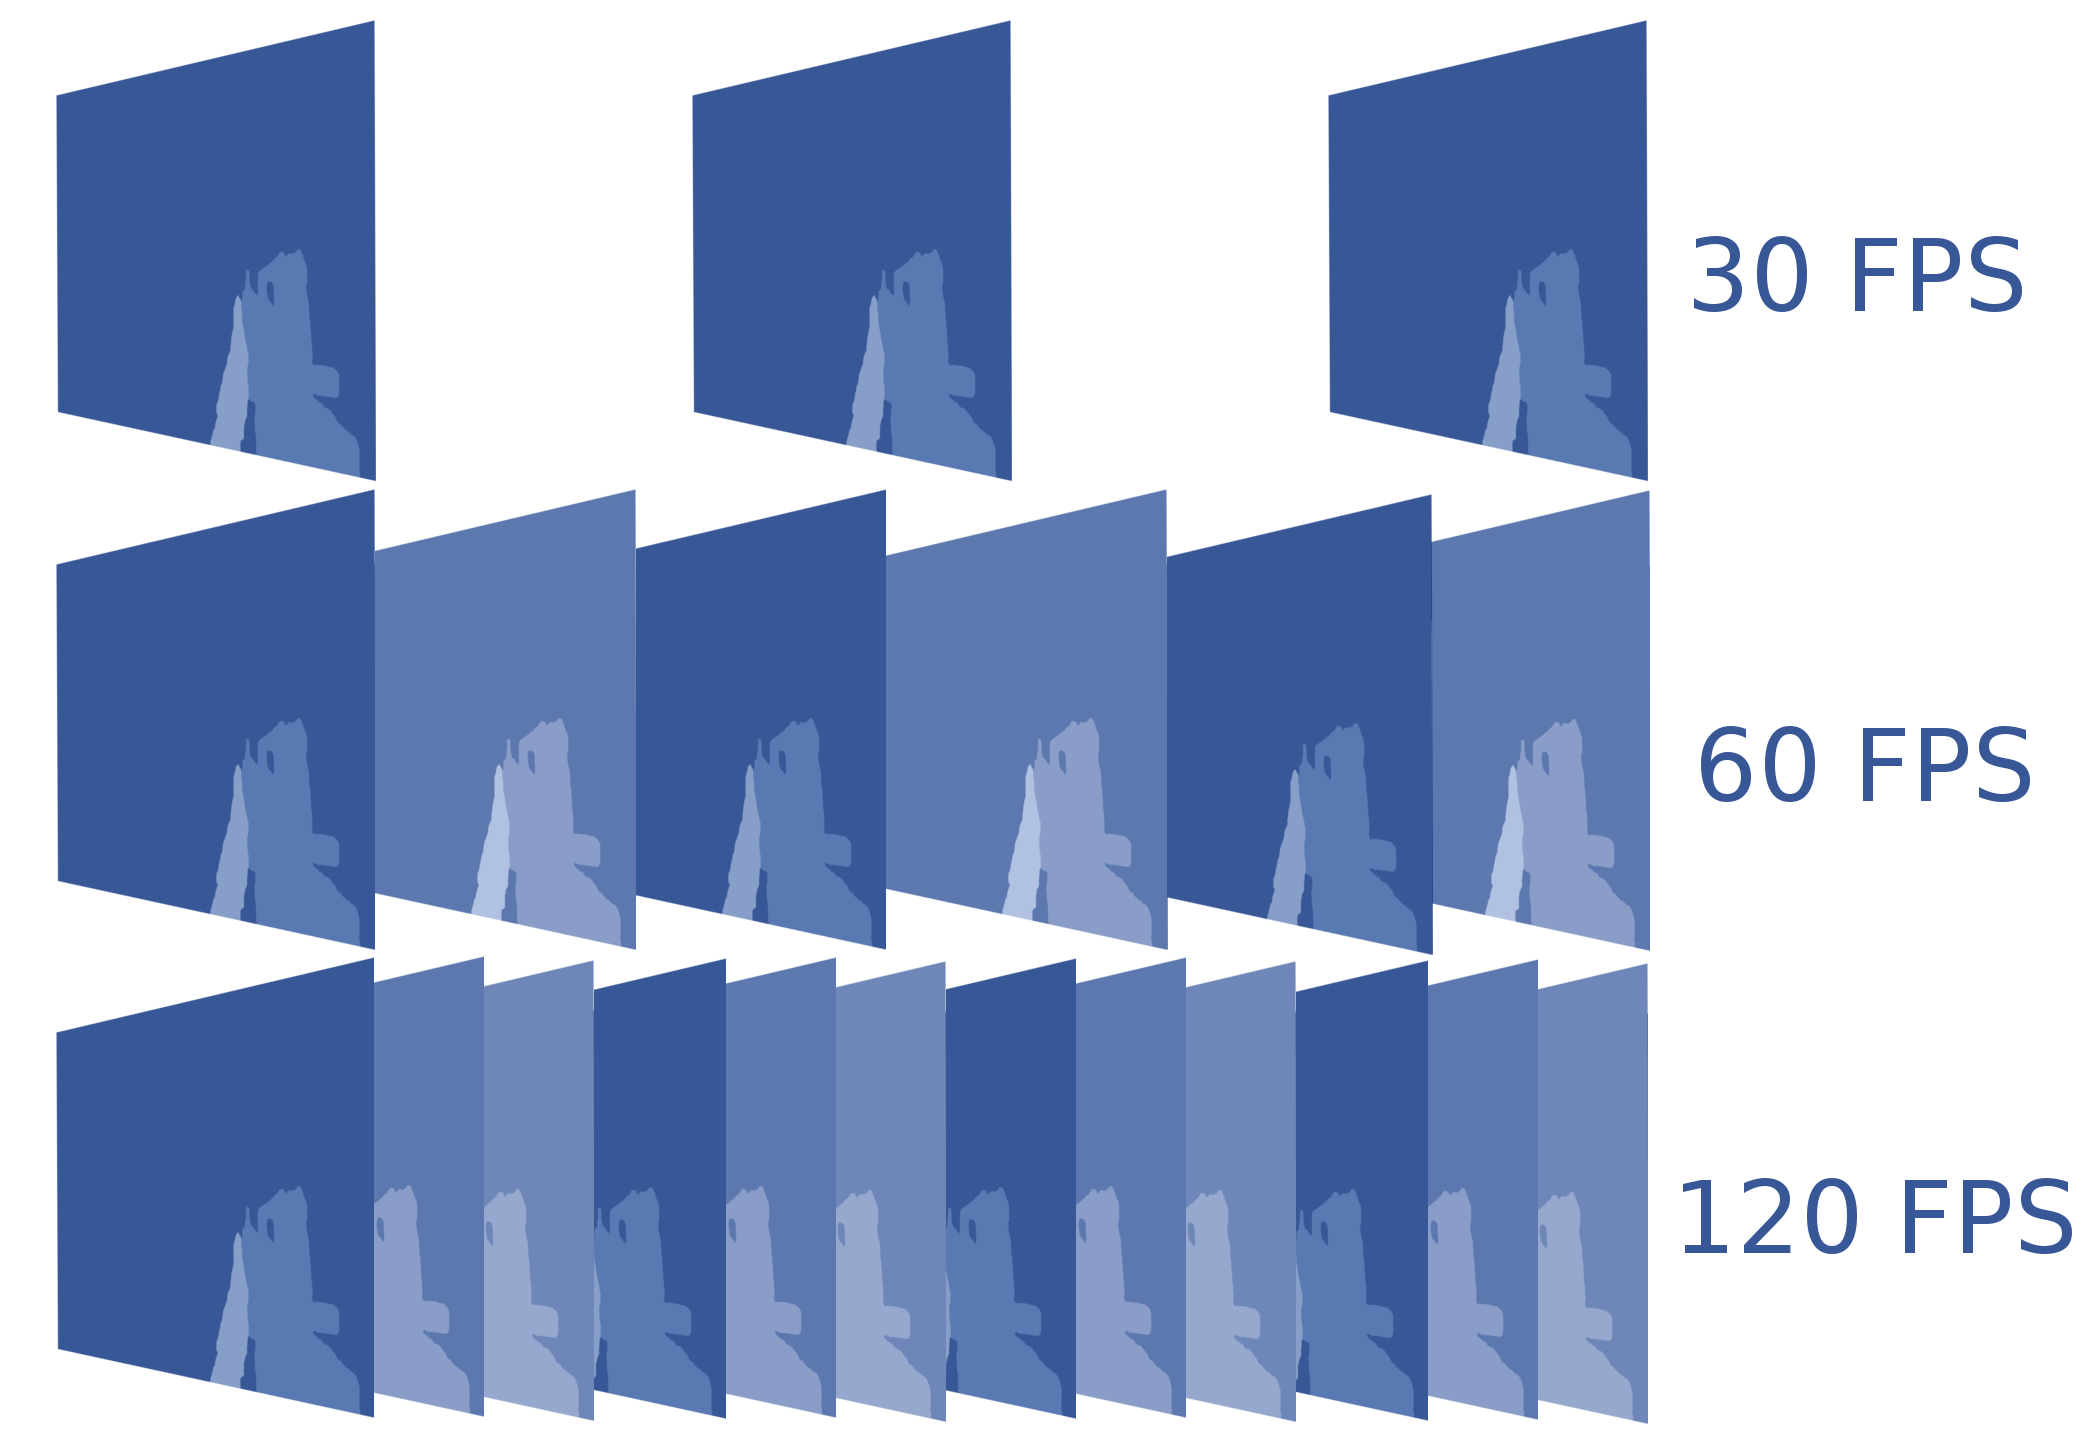

In [25]:
Image(filename= "../images/Frame_Rate_Visualization.png", width=700, height=700)

# Image Reference: 
#[PCGaming Wiki](https://www.pcgamingwiki.com/wiki/Glossary:Frame_rate_(FPS))

For our use case (lectures), we can just sample couple of frames per second

In [26]:
video_file_path = "../data/ODluYyMZzs0/video.mp4"
output_path =  "../data/ODluYyMZzs0/images"

In [27]:
from moviepy.editor import VideoFileClip
import os

In [28]:
clip = VideoFileClip(video_file_path)


In [29]:
fps = 0.2

In [30]:
print (f"""

Video Length : {clip.duration}
Video Resolution : {clip.size}
FPS : {fps}
Total Images : {clip.duration * fps}


""")



Video Length : 756.76
Video Resolution : [640, 360]
FPS : 0.2
Total Images : 151.352





In [31]:


clip.write_images_sequence(
    os.path.join(output_path, "frame%04d.png"), fps=fps
)

Moviepy - Writing frames ../data/ODluYyMZzs0/images/frame%04d.png.


Moviepy - Done writing frames ../data/ODluYyMZzs0/images/frame%04d.png.


['../data/ODluYyMZzs0/images/frame0000.png',
 '../data/ODluYyMZzs0/images/frame0001.png',
 '../data/ODluYyMZzs0/images/frame0002.png',
 '../data/ODluYyMZzs0/images/frame0003.png',
 '../data/ODluYyMZzs0/images/frame0004.png',
 '../data/ODluYyMZzs0/images/frame0005.png',
 '../data/ODluYyMZzs0/images/frame0006.png',
 '../data/ODluYyMZzs0/images/frame0007.png',
 '../data/ODluYyMZzs0/images/frame0008.png',
 '../data/ODluYyMZzs0/images/frame0009.png',
 '../data/ODluYyMZzs0/images/frame0010.png',
 '../data/ODluYyMZzs0/images/frame0011.png',
 '../data/ODluYyMZzs0/images/frame0012.png',
 '../data/ODluYyMZzs0/images/frame0013.png',
 '../data/ODluYyMZzs0/images/frame0014.png',
 '../data/ODluYyMZzs0/images/frame0015.png',
 '../data/ODluYyMZzs0/images/frame0016.png',
 '../data/ODluYyMZzs0/images/frame0017.png',
 '../data/ODluYyMZzs0/images/frame0018.png',
 '../data/ODluYyMZzs0/images/frame0019.png',
 '../data/ODluYyMZzs0/images/frame0020.png',
 '../data/ODluYyMZzs0/images/frame0021.png',
 '../data/

## Notes

We learned about how words might be broken to tokens.

How we can break documents to chunks.

How a video might be broken to frames